In [1]:
import numpy as np
import pandas as pd

In [80]:
df = pd.read_csv("train.csv")
df.drop("Loan_ID",axis='columns',inplace=True)
df.sample(3)
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [81]:
df.sample(3)
df.Gender.unique()
count = len(df.Gender) - df.Gender.count()
df.Gender.isnull().sum()

13

In [82]:
# df.drop(df[df.Gender.isnull()],axis=1,inplace=True)
df.sample(3)
df.iloc[23,0]

nan

In [83]:
df = df.dropna()
df.sample(3)
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [84]:
df.sample(3)
df.Married.unique()
df.Gender.replace({'Female':1,'Male':0},inplace=True)
df.Married.replace({'Yes':1,'No':0},inplace=True)
df['Dependents'] = df['Dependents'].str.replace('+','')
df['Dependents'] = pd.to_numeric(df['Dependents'],downcast='integer')

<ipython-input-84-eebb82288210>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Dependents'] = df['Dependents'].str.replace('+','')


In [85]:
df.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
464,0,0,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban,N
340,0,1,3,Not Graduate,No,2647,1587.0,173.0,360.0,1.0,Rural,N
356,0,1,2,Graduate,No,8333,3167.0,165.0,360.0,1.0,Rural,Y


In [86]:
df.Dependents.unique()

array([1, 0, 2, 3], dtype=int8)

In [87]:
df.Education.unique()
df.Education.replace({'Graduate':1,'Not Graduate':0},inplace=True)

In [88]:
df.Education.unique()

array([1, 0])

In [89]:
df.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
18,0,1,0,0,No,4887,0.0,133.0,360.0,1.0,Rural,N
258,0,1,0,1,No,14683,2100.0,304.0,360.0,1.0,Rural,N
448,0,1,2,1,No,3340,1710.0,150.0,360.0,0.0,Rural,N


In [90]:
df.Self_Employed.unique()
df.Self_Employed.replace({'Yes':1,'No':0},inplace=True)

In [91]:
df.ApplicantIncome.dtype
df.CoapplicantIncome.dtype
df.Credit_History.dtype
df.Property_Area.unique()
df.Property_Area.replace({'Rural':-1,'Urban':1,'Semiurban':0},inplace=True)

In [92]:
df.Property_Area.unique()

array([-1,  1,  0])

In [96]:
df.Loan_Status.unique()
df.Loan_Status.replace({'Y':1,'N':0},inplace=True)

In [98]:
df.sample(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int8   
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(7), int8(1)
memory usage: 45.5 KB


In [102]:
df.sample(3)
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

class_process = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

for i in class_process:
  df[i] = scaler.fit_transform(np.array(df[i]).reshape(-1,1))


In [103]:
df.sample(3)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
580,0,1,2,1,0,0.079035,0.000000,0.331641,0.729730,1.0,0,1
453,0,1,0,1,0,0.028856,0.072879,0.137056,0.324324,0.0,-1,1
386,0,0,0,0,0,0.027161,0.047286,0.208122,0.729730,1.0,0,1


In [105]:
x = df.drop('Loan_Status',axis='columns')
y = df['Loan_Status']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [106]:
import tensorflow as tf
from tensorflow import keras

In [113]:
model = keras.Sequential([
    keras.layers.Dense(8,input_shape=(x.shape[1],),activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
12/12 [==============================] - 1s 3ms/step - loss: 0.6194 - accuracy: 0.6875
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6168 - accuracy: 0.6875
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.6875
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.6875
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.6875
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6100 - accuracy: 0.6875
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.6875
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.6875
Epoch 9/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6050 - accuracy: 0.6875
Epoch 10/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.6875
Epoch 11/50
12/12 [

In [115]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.4932 - accuracy: 0.8229


[0.49322906136512756, 0.8229166865348816]

In [117]:
pred = model.predict(x_test)
y_pred = []

for i in pred:
  if i< 0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

3/3 [==============================] - 0s 4ms/step


In [118]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



Text(95.72222222222221, 0.5, 'Truth')

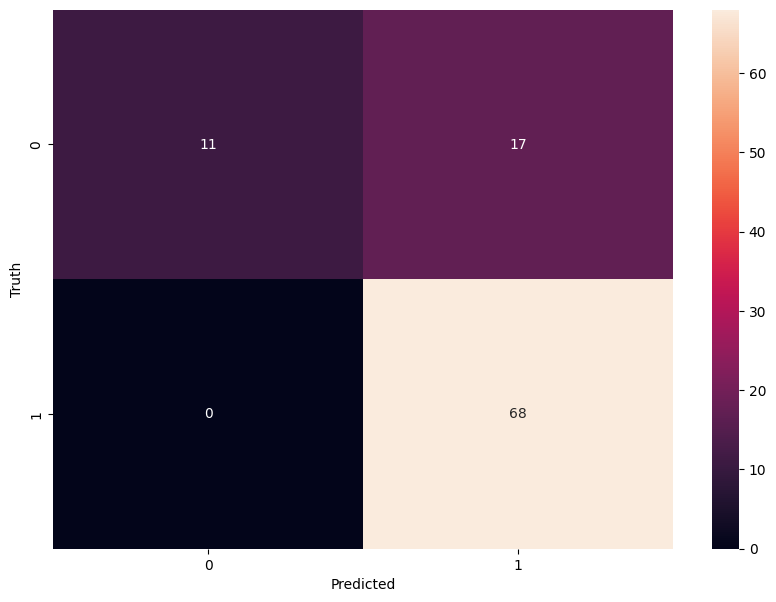

In [119]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')